In [ ]:
#matplotlib pra gerar o gráfico
#pandas pra gerenciar o df
import matplotlib.pyplot as plt
import pandas as pd

#FI é o bias, APRENDIZADO vai ser a taxa de melhoria do neurônio, ATIVACAO é a saida do neurônio
#Definição de constantes
FI = 1
APRENDIZADO = 1
ATIVACAO = [-1, 1]


In [ ]:
#Series dos dados, com atributos e os calculos deles
#ru = ru a ser analisada
#saida_d = saida gerada pelo código
#resp_f = resposta do neurônio para o atributo usado
#obj_o = o objetivo a ser alcançado na saida da resposta
#class_atual = a classificação atual que o neurônio colocou o ru
#class_alvo = a classificação objetivo que o neurônio deve alcançar
#erro = calculo da diferença entre o objetivo e o resultado entre resposta e objetivo
#delta = calculo da relação entre  ru, peso e erro

ru = pd.Series([0.4112670, 0.4112680, 0.4112681, 0.4112682, 0.4112690])
saida_d = pd.Series([None, None, None, None, None])
resp_f = pd.Series([None, None, None, None, None])
obj_o = pd.Series([-1, -1, 1, 1, 1])
class_atual = pd.Series([None, None, None, None, None])
class_alvo = pd.Series(['B', 'B', 'A', 'A', 'A'])
erro = pd.Series([None, None, None, None, None])
delta = pd.Series([None, None, None, None, None])

#dataframe com as séries anteriores criadas
amostras = pd.DataFrame({'ru':ru, 'saida_d':saida_d, 'resp_f':resp_f, 'obj_o':obj_o, 'class_atual':class_atual, 'class_alvo':class_alvo, 'erro':erro, 'delta':delta})


In [ ]:
#Peso usado para fazer o treino do neurônio. valor inicial padrão 1
#peso_mudou vou comparar quando o neurônio já atingiu o treino necessário
#soma_delta vai ser usada para pegar o calculo do erro, ru e peso para ser usado no teino do peso
#i vai ser usado para varrer o df
#Definição de variáveis
#peso = 1.0 
peso = 2.4315045049087387 #é o peso ideal neste caso
peso_mudou = None
soma_delta = i = 0


#Enquanto o peso treinado for diferente do teste anterior, o treino ainda não atingiu um patamar bom, então vai continuar
#INICIO DE PRIMEIRA ITERAÇÃO
while (peso != peso_mudou):
  #Enquanto existir amostras a serem trabalhadas, vai continuar no laço
  while i < len(amostras.index):
    #saida_d = (ru*peso)-FI
    amostras.loc[i, 'saida_d'] = (amostras.loc[i, 'ru']*peso)-FI
    #resp_f = se (saida_d >= 0) então '1', se não, '-1'
    if(amostras.loc[i, 'saida_d'] >= 0):
      amostras.loc[i, 'resp_f'] = ATIVACAO[1]
    else:
      amostras.loc[i, 'resp_f'] = ATIVACAO[0]

    #obj_o = o que resposta_f tem que ser, serve apenas para comparação

    #class_atual = se (resp_f = 1) então 'A', se não, 'B'
    if(amostras.loc[i, 'resp_f'] == 1):
      amostras.loc[i, 'class_atual'] = "A"
    else:
      amostras.loc[i, 'class_atual'] = "B"

    #class_alvo = o que class_atual tem que ser, serve apenas para comparação

    #erro = obj_o - resp_f
    amostras.loc[i, 'erro'] = amostras.loc[i, 'obj_o'] - amostras.loc[i, 'resp_f']

    #delta = APRENDIZADO * ru * erro
    amostras.loc[i, 'delta'] = APRENDIZADO * amostras.loc[i, 'ru'] * amostras.loc[i, 'erro']
    soma_delta += amostras.loc[i, 'delta']
    i += 1

  #CORREÇÃO DE PESOS
  peso_mudou = peso
  peso += soma_delta
  soma_delta = i = 0


In [ ]:
#Series dos dados, parecido com a serie anterior, mas com os dados para realmente classificar os dados
#ru = ru a ser analisada
#saida_d = saida gerada pelo código
#resp_f = resposta do neurônio para o atributo usado
#class_atual = a classificação entre A = 1 e B = -1
#faixa_ru = meu ru usado para dividir a classificação
ru = pd.Series([0.4112568, 0.4112336, 0.4112565, 0.4112874, 0.4112681])
saida_d = pd.Series([None, None, None, None, None])
resp_f = pd.Series([None, None, None, None, None])
class_atual = pd.Series([None, None, None, None, None])

#Dataframe com as séries anteriores
teste = pd.DataFrame({'ru':ru, 'saida_d':saida_d, 'resp_f':resp_f, 'class_atual':class_atual})


In [ ]:
#i vai ser usado para varrer o df
#Definição de variáveis
i = 0

#Enquanto existir amostras a serem trabalhadas, vai continuar no laço
while i < len(teste.index):
  #saida_d = (ru*peso)-FI
  teste.loc[i, 'saida_d'] = (teste.loc[i, 'ru']*peso)-FI
  #resp_f = se (saida_d >= 0) então '1', se não, '-1'
  if(teste.loc[i, 'saida_d'] >= 0):
    teste.loc[i, 'resp_f'] = ATIVACAO[1]
  else:
    teste.loc[i, 'resp_f'] = ATIVACAO[0]
  #class_atual = se (resp_f >= 0) então 'A', se não, 'B'
  if(teste.loc[i, 'resp_f'] == 1):
    teste.loc[i, 'class_atual'] = 'A'
  else:
    teste.loc[i, 'class_atual'] = 'B'
  i += 1


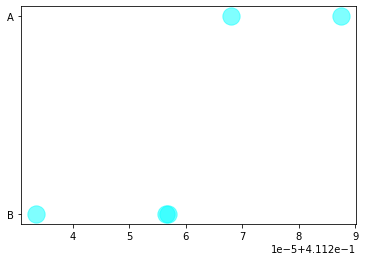

In [ ]:
plt.scatter(teste['ru'], teste['class_atual'], color='#0ff', s=300, alpha=0.5)
plt.show()